In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

import copy

## Linear Regression with 1 variable

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

m = len(x_train)

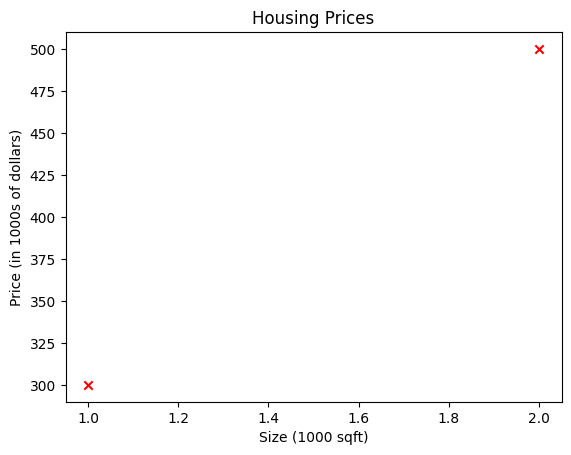

In [3]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

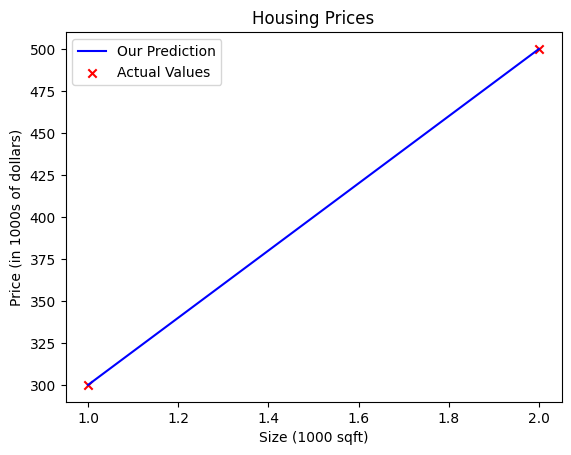

In [5]:
w = 200
b = 100

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [6]:
x_train_test = np.append(x_train, 1.2)

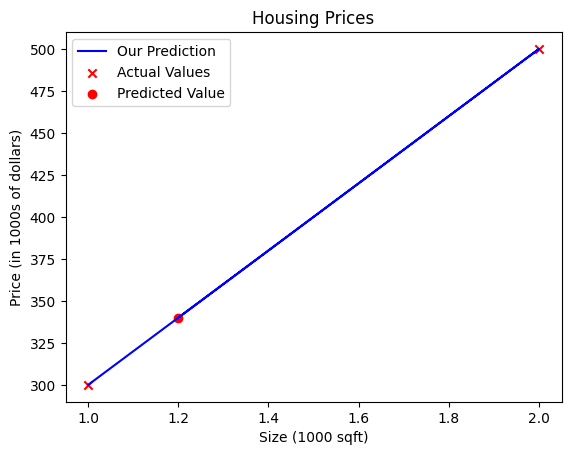

In [7]:
tmp_f_wb = compute_model_output(x_train_test, w, b,)

# Plot our model prediction
plt.plot(x_train_test, tmp_f_wb, c='b',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.scatter(x_train_test[-1], tmp_f_wb[-1], marker='o', c='r',label='Predicted Value')

plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

## Cost Function

In [8]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    cost_sum = 0 
    
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
        
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [9]:
compute_cost(x_train, y_train, 100, 50)

21250.0

In [10]:
compute_cost(x_train, y_train, 200, 100)

0.0

## Gradient Descent

In [14]:
def compute_gradient(x, y, w, b): 
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
        
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [12]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost_function, gradient_function): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_init
    w = w_init
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [17]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


## Multiple Variables

In [64]:
def compute_cost(X, y, w, b, lambda_ = 1): 
    m = X.shape[0]
    
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost
    
    return total_cost

In [22]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [23]:
np.dot(X_train[0], w_init)

-325.18113917999995

In [68]:
def compute_gradient(X, y, w, b, lambda_=1): 
    m,n = X.shape[0], X.shape[1]           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m    
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
        
    return dj_db, dj_dw

In [69]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [36]:
def gradient_descent(X, y, w_init, b_init, cost_function, gradient_function, alpha, num_iters):     
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_init)  #avoid modifying global w within function
    b = b_init
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

## Feature Scaling

In [29]:
# X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [30]:
# (2104+1416+852)/3

1457.3333333333333

In [28]:
np.mean(X_train, axis=0) 

array([1.45733333e+03, 3.33333333e+00, 1.33333333e+00, 4.00000000e+01])

In [43]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

#     return (X_norm, mu, sigma)
    return X_norm

In [27]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.45733333e+03 3.33333333e+00 1.33333333e+00 4.00000000e+01], 
X_sigma = [5.11961804e+02 1.24721913e+00 4.71404521e-01 4.08248290e+00]
Peak to Peak range by column in Raw        X:[1252    3    1   10]
Peak to Peak range by column in Normalized X:[2.44549494 2.40535118 2.12132034 2.44948974]


In [51]:
# def compute_gradient_matrix(X, y, w, b): 
#     m,n = X.shape
#     f_wb = X @ w + b              
#     e   = f_wb - y                
#     dj_dw  = (1/m) * (X.T @ e)    
#     dj_db  = (1/m) * np.sum(e)    
        
#     return dj_db,dj_dw

In [49]:
def run_gradient_descent(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)

Iteration    0: Cost     0.22   
Iteration 100000: Cost     0.02   
Iteration 200000: Cost     0.02   
Iteration 300000: Cost     0.02   
Iteration 400000: Cost     0.02   
Iteration 500000: Cost     0.02   
Iteration 600000: Cost     0.02   
Iteration 700000: Cost     0.02   
Iteration 800000: Cost     0.02   
Iteration 900000: Cost     0.02   
w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.0073


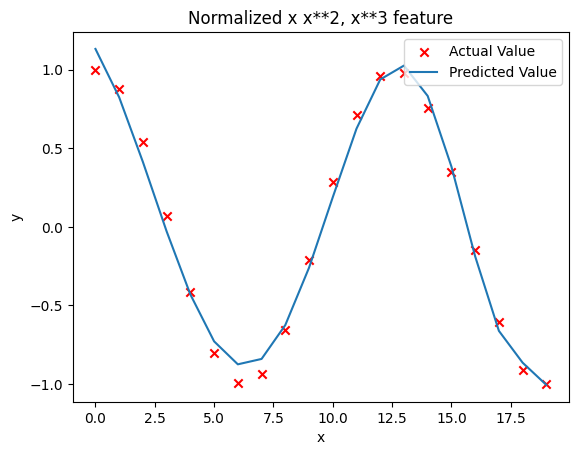

In [50]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


# Linear Regression using Scikit-Learn

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [54]:
X_norm

array([[ 1.26311506,  1.33630621, -0.70710678,  1.22474487],
       [-0.08073519, -0.26726124,  1.41421356,  0.        ],
       [-1.18237987, -1.06904497, -0.70710678, -1.22474487]])

In [55]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 1000, number of weight updates: 3001.0


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [62]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 38.05815861  41.53525063 -30.88008619  36.35455354], b:[288.72162069]


In [61]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[458.6578388  230.87718868 176.6298346 ]
Target values 
[460 232 178]


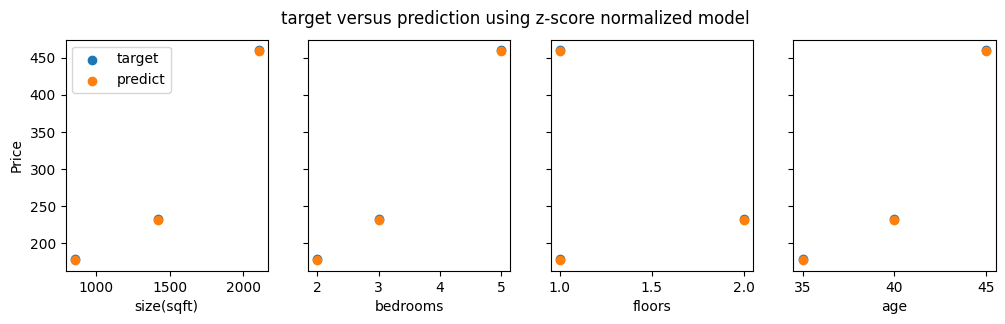

In [60]:
X_features = ['size(sqft)','bedrooms','floors','age']

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()